In [37]:
# use moon dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
# majority vote
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# a mix of RandomForestClassifier , LogisticRegression and SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf',rnd_clf),('svc', svm_clf)],
                             voting='hard')
voting_clf.fit(X_train, y_train)
# it all classes have predict_proba (can output possibility)
# voting = 'soft' could be used to ensure the output to be probability

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [39]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [40]:
# try soft voting
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf',rnd_clf),('svc', svm_clf)],
                             voting='soft')
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [41]:
# using the same training algorithm for every predictor but different random
# subsets of the training set is called 
#"bagging"  when sampling is performed with  replacement
# without replacement, it is called "pasting"

# with replacementは復元抽出
# 一度抽出したものを戻すこと

In [46]:
# bootstrap = False means pasting(復元抽出しない)
# n_jobs is the CPU cores to use (-1) means using all cores
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators = 500,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
# the ensemble trees will generalize better than the DecisionTreeClassifier
# bagging: higher bias but lower variance
# pagging: lower bias but higher variance
accuracy_score(y_test, y_pred)

0.928

In [47]:
# some data may not be sampled when using bagging,
# setting obb_score=True to request and automatic oob evaluation after training
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 500,
                            bootstrap=True,
                            n_jobs=-1,
                            oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [48]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [50]:
bag_clf.oob_decision_function_[:5]
# returns the class probabilities for each training instance
# for example, the first training instances has 40.782% to be negative
# 59.21% of being positive

array([[0.40782123, 0.59217877],
       [0.35185185, 0.64814815],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.00534759, 0.99465241]])

In [51]:
# Random Forest is an ensemble of Decision Trees
# Thus, DecisionTreeClassifier can be used instead
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
# this is equivalent to
bag_clf= BaggingClassifier(DecisionTreeClassifier(splitter="random"),
                           max_leaf_nodes=16,
                           n_estimators=500,
                           max_samples=1.0,
                           bootstrap=True,
                           n_jobs=-1)

In [ ]:
# random thresholds can also be used with Scikit-Learn's ExtraTreesClassifier class
# and ExtraTreesRegressor
# to decide which is better, use cross-validation after training both


In [53]:
# Random Forests measure the relative importance of each feature by
# measuring how much the tree nodes that use the feature reduce impurity 
# on average
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.10562842639626256
sepal width (cm) 0.026598238132457878
petal length (cm) 0.42942312691339646
petal width (cm) 0.4383502085578831


In [ ]:
# another example is on P265-266

In [56]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [57]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,interpolation="nearest")
    plt.axis("off")

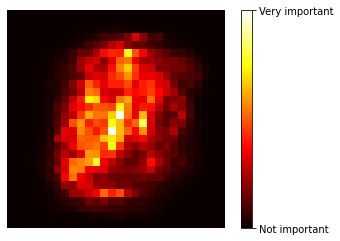

In [67]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

In [ ]:
# Boosting: ensemble methos that can combine several weak learners into a stronger one
# the general idea it to correct the predecessor(by training predictors sequentially)


In [74]:
# 1. AdaBoost
# pay a bit more attention to the training instances that the predecessor underfitted
# resulting in new predictors focusing more on the hard cases
# P269
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [75]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

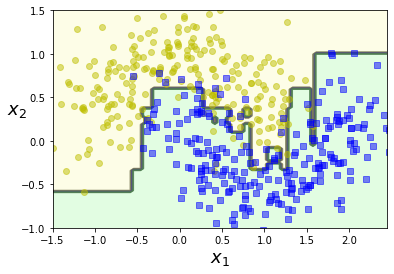

In [76]:
plot_decision_boundary(ada_clf, X, y)

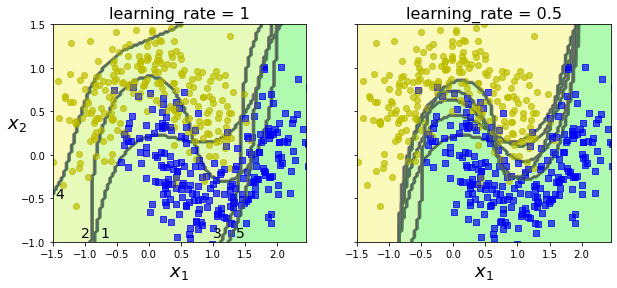

In [77]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

In [87]:
# Scikit-learn uses SAMME
# SAMME is equivalent to AdaBoost
# if the predictor has predict_proba(), SAMME.R can be used which relies on
# class probabilities rather than predictions and generally performs better

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm="SAMME.R",
                             learning_rate=0.5,
                            )
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.896

In [93]:
len(X_train)

375

In [116]:
# 2. Gradient Boosting
# instead of tweaking the instance weights at every iteration like AdaBoost,
# it tries to fit the new predictor to the residual errors made by the precious predictor
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)


DecisionTreeRegressor(max_depth=2)

In [117]:
# train a second DecisionTreeRegressor onthe residual errors made by the fit

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [118]:
# third
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)


DecisionTreeRegressor(max_depth=2)

In [120]:
X_new = np.array([[0.8]])

In [121]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [122]:
y_pred

array([0.75026781])

In [123]:
# a simpler to train GBRT ensembles is to use Scikit-Learn's
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=3,
                                 learning_rate=1.0)
# n_estimators here means the number of training loop above
gbrt.fit(X,y)
# the learning_rate hyperparameter scales the contribution of each tree
# a low value means needing more trees inthe ensemble to fit the training set but usually generalize better


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [124]:
# a way to find optimal number of trees is early stopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_val, y_train,y_val = train_test_split(X,y)

In [128]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]
# measure the validation error at each stage of training to find the optimal number
# of trees ( above 120)
bst_n_estimators = np.argmin(errors)+1
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)
min_error = np.min(errors)

In [130]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

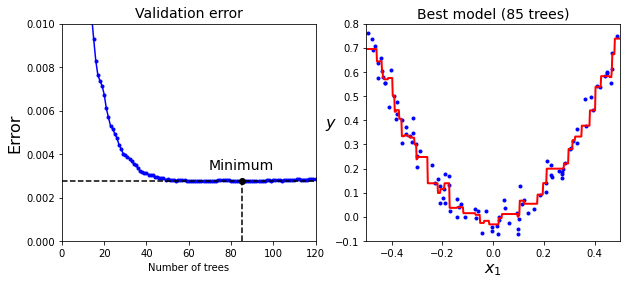

In [131]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [ ]:
# another way of early stopping is to actually stop training early
# warm_start = True 
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error= float("inf") # 正の無限大で初期化
error_going_up=0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up ==5:
            break # early stopping when reaching a point with a lower error
                   # than even the following 5 iterations
# can set subsample= xx ( xx is a number between 0 and 1)
# which means each tree to be trained on xx (%) of the training instances
# this is called Stochastic Gradient Boosting

In [135]:
# better library
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [138]:
# some features are offered as well
xgb_reg.fit(X_train, y_train,
            eval_set =[(X_val, y_val)], early_stopping_rounds=2)
# this code gives early stopping
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.22055
[1]	validation_0-rmse:0.16547
[2]	validation_0-rmse:0.12243
[3]	validation_0-rmse:0.10044
[4]	validation_0-rmse:0.08467
[5]	validation_0-rmse:0.07344
[6]	validation_0-rmse:0.06728
[7]	validation_0-rmse:0.06383
[8]	validation_0-rmse:0.06125
[9]	validation_0-rmse:0.05959
[10]	validation_0-rmse:0.05902
[11]	validation_0-rmse:0.05852
[12]	validation_0-rmse:0.05844
[13]	validation_0-rmse:0.05801
[14]	validation_0-rmse:0.05747
[15]	validation_0-rmse:0.05772
[16]	validation_0-rmse:0.05778


In [ ]:
# Stacking
# taking different predcitions by multipul predictors together to a final prediction


In [ ]:
# a hold-out set
# split the training set into different subsets and train different layers
# use upper layers' predictors to make predictions( inputs for upper layers aswell)

# an open source implementation "brew" provides this